In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

s = pd.read_csv("C:\\Users\\santi\\Downloads\\songs.csv","\t")
a = pd.read_csv("C:\\Users\\santi\\Downloads\\acoustic_features.csv","\t")
s.head(4)

song_id                                      song_name  \
0  3e9HZxeyfWwjeyPAMmWSSQ                                  thank u, next   
1  5p7ujcrUXASCNwRaWNHR1C                                     Without Me   
2  2xLMifQCjDGFmkHkpNLD9h                                     SICKO MODE   
3  3KkXRkHbMCARz0aVfEt68P  Sunflower - Spider-Man: Into the Spider-Verse   

                                           billboard  \
0                 ('Thank U, Next', 'Ariana Grande')   
1                           ('Without Me', 'Halsey')   
2                     ('Sicko Mode', 'Travis Scott')   
3  ('Sunflower (Spider-Man: Into The Spider-Verse...   

                                             artists  popularity  explicit  \
0        {'66CXWjxzNUsdJxJ2JdwvnR': 'Ariana Grande'}          86      True   
1               {'26VFTg2z8YR0cCuwLzESi2': 'Halsey'}          87      True   
2         {'0Y5tJX1MQlPlqiwlOH1tJY': 'Travis Scott'}          85      True   
3  {'246dkjvS1zLTtiykXe5h60': 'Post Malone', '1zN...          92     False   

       song_type  
0           Solo  
1           Solo  
2           Solo  
3  Collaboration

## EDA

In [11]:
a.head(4)

song_id  duration_ms  key  mode  time_signature  \
0  3e9HZxeyfWwjeyPAMmWSSQ       207320    1     1               4   
1  5p7ujcrUXASCNwRaWNHR1C       201661    6     1               4   
2  2xLMifQCjDGFmkHkpNLD9h       312820    8     1               4   
3  3KkXRkHbMCARz0aVfEt68P       158040    2     1               4   

   acousticness  danceability  energy  instrumentalness  liveness  loudness  \
0       0.22900         0.717   0.653          0.000000    0.1010    -5.634   
1       0.29700         0.752   0.488          0.000009    0.0936    -7.050   
2       0.00513         0.834   0.730          0.000000    0.1240    -3.714   
3       0.55600         0.760   0.479          0.000000    0.0703    -5.574   

   speechiness  valence    tempo  
0       0.0658    0.412  106.966  
1       0.0705    0.533  136.041  
2       0.2220    0.446  155.008  
3       0.0466    0.913   89.911

In [17]:
final = pd.merge(s,a,on="song_id")
final.head(4)

song_id                                      song_name  \
0  3e9HZxeyfWwjeyPAMmWSSQ                                  thank u, next   
1  5p7ujcrUXASCNwRaWNHR1C                                     Without Me   
2  2xLMifQCjDGFmkHkpNLD9h                                     SICKO MODE   
3  3KkXRkHbMCARz0aVfEt68P  Sunflower - Spider-Man: Into the Spider-Verse   

                                           billboard  \
0                 ('Thank U, Next', 'Ariana Grande')   
1                           ('Without Me', 'Halsey')   
2                     ('Sicko Mode', 'Travis Scott')   
3  ('Sunflower (Spider-Man: Into The Spider-Verse...   

                                             artists  popularity  explicit  \
0        {'66CXWjxzNUsdJxJ2JdwvnR': 'Ariana Grande'}          86      True   
1               {'26VFTg2z8YR0cCuwLzESi2': 'Halsey'}          87      True   
2         {'0Y5tJX1MQlPlqiwlOH1tJY': 'Travis Scott'}          85      True   
3  {'246dkjvS1zLTtiykXe5h60': 'Post Malone', '1zN...          92     False   

       song_type  duration_ms  key  mode  time_signature  acousticness  \
0           Solo       207320    1     1               4       0.22900   
1           Solo       201661    6     1               4       0.29700   
2           Solo       312820    8     1               4       0.00513   
3  Collaboration       158040    2     1               4       0.55600   

   danceability  energy  instrumentalness  liveness  loudness  speechiness  \
0         0.717   0.653          0.000000    0.1010    -5.634       0.0658   
1         0.752   0.488          0.000009    0.0936    -7.050       0.0705   
2         0.834   0.730          0.000000    0.1240    -3.714       0.2220   
3         0.760   0.479          0.000000    0.0703    -5.574       0.0466   

   valence    tempo  
0    0.412  106.966  
1    0.533  136.041  
2    0.446  155.008  
3    0.913   89.911

In [18]:
final = final[['popularity',
       'explicit', 'song_type', 'duration_ms', 'key', 'mode', 'time_signature',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'valence', 'tempo']]

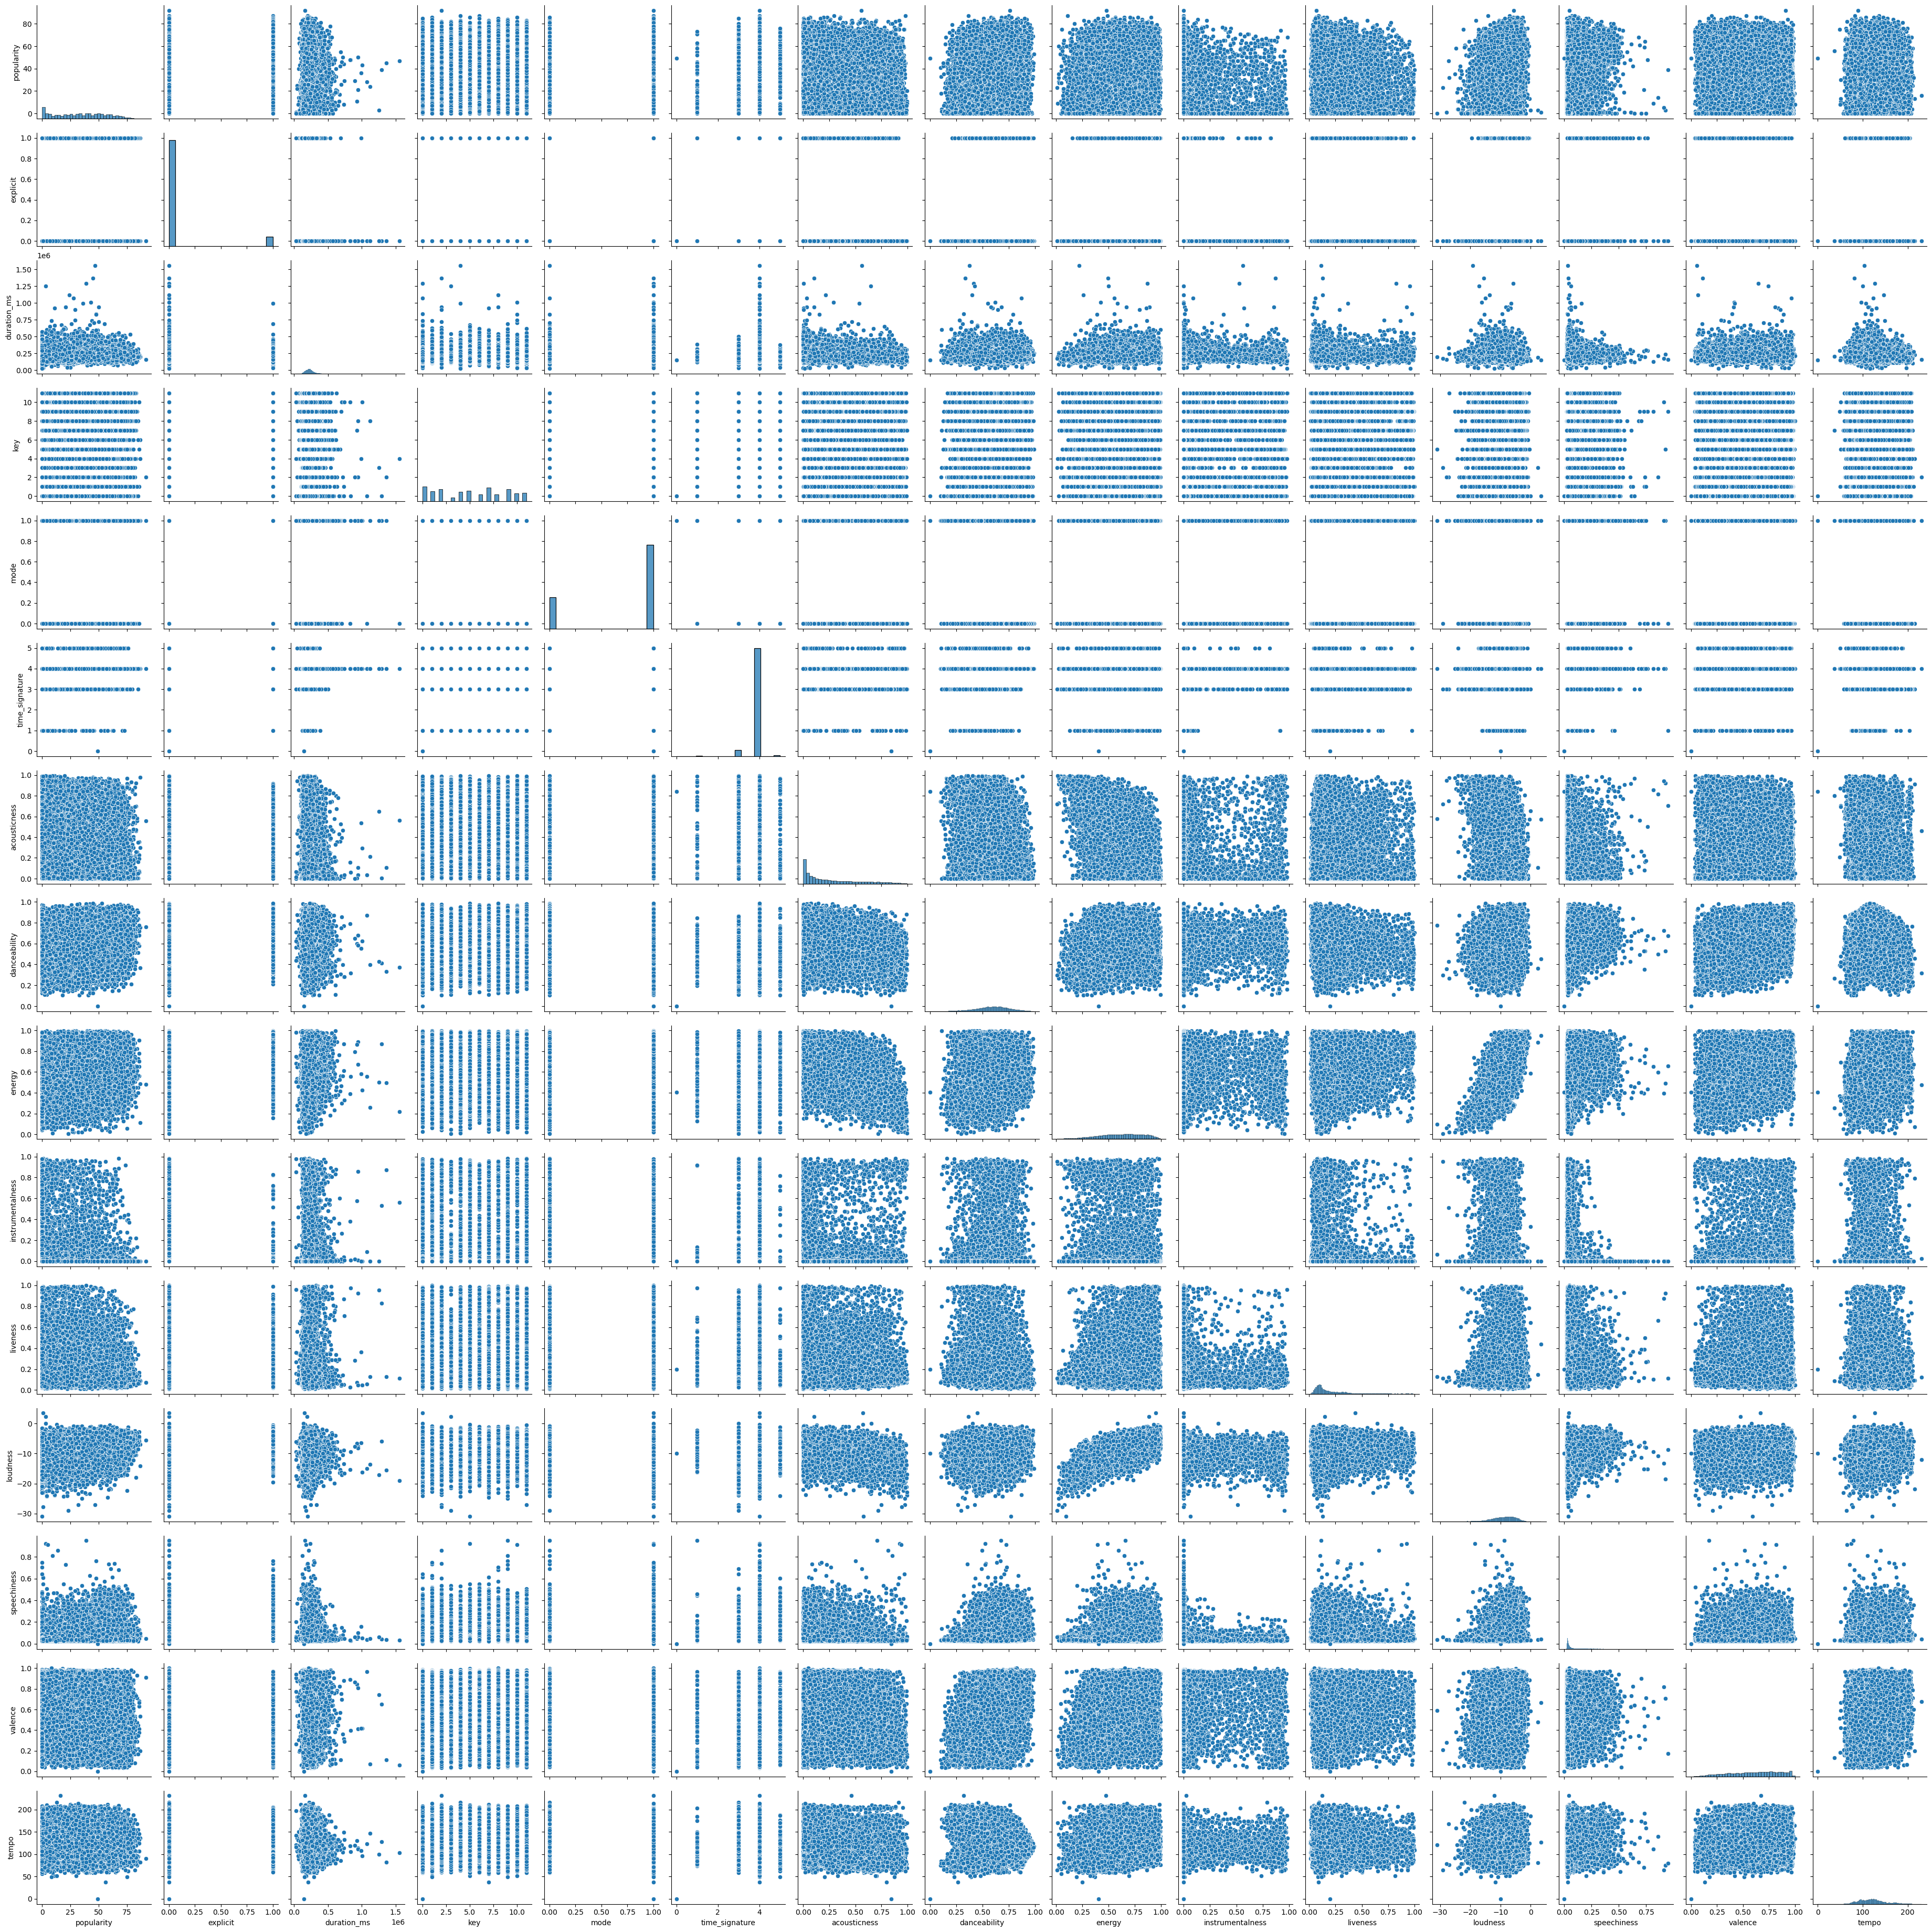

In [19]:
sns.pairplot(final)

In [95]:
#nan values
final.isna().sum()

popularity          0
explicit            0
song_type           0
duration_ms         0
key                 0
mode                0
time_signature      0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
valence             0
tempo               0
dtype: int64

In [20]:
final.describe()

popularity   duration_ms           key          mode  time_signature  \
count  20405.000000  2.040500e+04  20405.000000  20405.000000    20405.000000   
mean      33.980838  2.295437e+05      5.224651      0.727028        3.943592   
std       22.030362  6.705696e+04      3.567111      0.445498        0.289162   
min        0.000000  2.460400e+04      0.000000      0.000000        0.000000   
25%       14.000000  1.864930e+05      2.000000      0.000000        4.000000   
50%       35.000000  2.230260e+05      5.000000      1.000000        4.000000   
75%       52.000000  2.596930e+05      8.000000      1.000000        4.000000   
max       92.000000  1.561133e+06     11.000000      1.000000        5.000000   

       acousticness  danceability        energy  instrumentalness  \
count  20405.000000  20405.000000  20405.000000      20405.000000   
mean       0.265201      0.600342      0.625056          0.047546   
std        0.264370      0.150627      0.197120          0.168418   
min        0.000001      0.000000      0.006640          0.000000   
25%        0.039200      0.502000      0.481000          0.000000   
50%        0.169000      0.608000      0.640000          0.000010   
75%        0.440000      0.706000      0.783000          0.001110   
max        0.995000      0.988000      0.998000          0.985000   

           liveness      loudness   speechiness       valence         tempo  
count  20405.000000  20405.000000  20405.000000  20405.000000  20405.000000  
mean       0.192335     -8.845186      0.067537      0.607777    120.313409  
std        0.164047      3.593048      0.074369      0.236527     27.683465  
min        0.013000    -30.896000      0.000000      0.000000      0.000000  
25%        0.088300    -11.217000      0.031900      0.427000     99.735000  
50%        0.129000     -8.471000      0.040400      0.632000    118.952000  
75%        0.249000     -6.051000      0.063000      0.804000    135.903000  
max        0.997000      3.440000      0.950000      1.000000    231.028000

In [40]:
#value count per category
for x in ['key','mode','time_signature']:
    print(f"*********************{x}-****************************")
    print(final[x].value_counts())

*********************key-****************************
0     2578
7     2371
2     2170
9     2163
5     1805
1     1778
4     1635
11    1462
10    1421
6     1208
8     1176
3      638
Name: key, dtype: int64
*********************mode-****************************
1    14835
0     5570
Name: mode, dtype: int64
*********************time_signature-****************************
4    19137
3     1085
5      121
1       61
0        1
Name: time_signature, dtype: int64


Text(0.5, 1.0, 'key box plot')

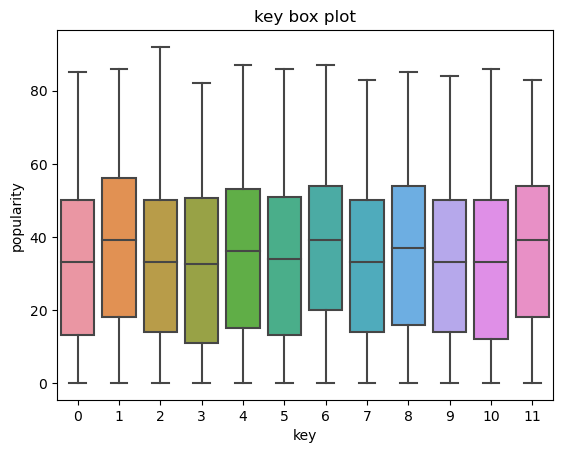

In [85]:
sns.boxplot(data=final, x='key',y='popularity')
plt.title("key box plot")

Text(0.5, 1.0, 'Mode box plot')

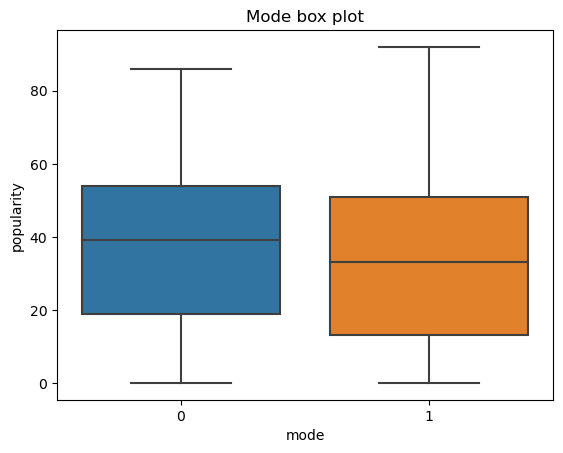

In [86]:
sns.boxplot(data=final, x='mode',y='popularity')
plt.title("Mode box plot")

Text(0.5, 1.0, 'time signature box plot')

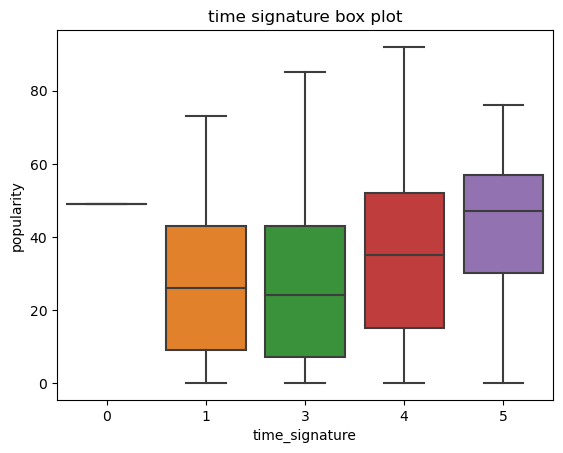

In [87]:
sns.boxplot(data=final, x='time_signature',y='popularity')
plt.title("time signature box plot")

Text(0.5, 1.0, 'Popularity distribution')

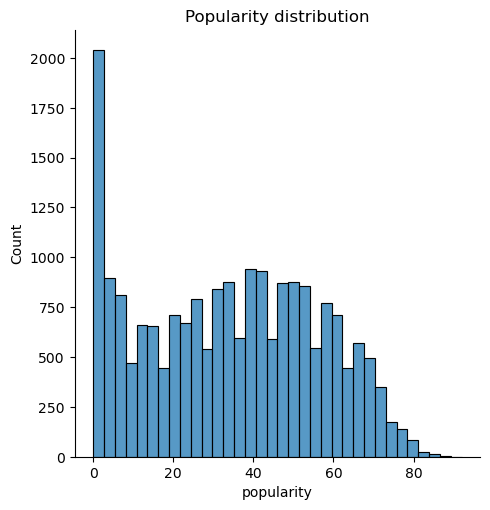

In [89]:
sns.displot(data = final,x='popularity')
plt.title("Popularity distribution")

In [94]:
#finding median value for predicting later if a song would be bolow or above median
final['popularity'].quantile(0.5)

35.0